# Exploratory Data Analysis on Chess Games played on LiChess

![](https://images.unsplash.com/photo-1586165368502-1bad197a6461?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=958&q=80)

In [1]:
!pip install jovian --upgrade --quiet

import jovian
jovian.commit(project="EDA-Chess-Games")

     |████████████████████████████████| 68 kB 3.2 MB/s 
[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

### Outline of the Project(Steps Involved) :
1.Installing Packages and Importing Required Libraries.<br>
2.Data Selection - Select a Real-World Dataset from Kaggle or/and from any other dataset providing website like Data.world, Google Datasets etc.<br>
3.Data Collection - Download the Dataset - Using Python Library Opendatasets.<br>
4.Explore the Dataset - Understanding the contents of the Dataset.<br>
5.Data Preprocessing - Data Preparation & Cleaning - Handling Missing Values, Null Values, Duplicates, Outliers.<br>
6.Exploratory Analysis and Visualization - Ask and answer questions about the dataset.<br>
7.Summary,Conclusion,Future works and References.<br>
8.Submission - Uploading your Notebook to Jovian Profile.<br>

## Step-1 : Installing Packages and Importing Libraries

In [2]:
# Installing Packages
!pip install opendatasets --upgrade --quiet
!pip install plotly --upgrade --quiet

     |████████████████████████████████| 15.3 MB 5.4 MB/s 


In [3]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## Step-2 : Data Selection

Chess is a board game between two players. It is one of the world's most popular games, played by millions of people worldwide. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. The player controlling the white pieces moves first, followed by the player controlling the black pieces. The object of the game is to checkmate the opponent's king, whereby the king is under immediate attack (in "check") and there is no way for it to escape. There are also several ways a game can end in a draw.<br>

**lichess.org** is a free/libre, open-source chess server powered by volunteers and donations.<br>

This dataset contains 6.25 Million chess games played on lichess.org during July of 2016.<br>
Some of the games have Stockfish analysis evaluations from White's point of view. These are evaluations of the movement made by a player.

![](https://media.istockphoto.com/id/1320665200/photo/chessboard-pieces.jpg?b=1&s=170667a&w=0&k=20&c=kpiYnybNfWxEB8GWxKGYs9uVJU1M9wou-Qg_B7eqSYI=)

Data Source:

The Dataset for this analysis [Lichess Games](https://database.lichess.org/) is obtained from [Kaggle](https://www.kaggle.com/).

## Step-3 : Data Collection

opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

Datasets can be downloaded within a Jupyter notebook or Python script using the opendatasets.download helper function

In [4]:
dataset_url='https://www.kaggle.com/datasets/arevel/chess-games'

In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankuragupta
Your Kaggle Key: ··········


100%|██████████| 1.45G/1.45G [00:11<00:00, 135MB/s]


In [6]:
data_dir = 'chess-games'
os.listdir(data_dir)

['chess_games.csv']

## Step-4 : Explore the Dataset

In [7]:
chess_raw_df = pd.read_csv(data_dir + '/chess_games.csv')
chess_raw_df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


## Step-5 : Data Preparation

![data-preparation-xenonstack.webp](https://www.xenonstack.com/hubfs/data-preparation-xenonstack.jpg)

![svM3fTk.png](https://i.imgur.com/svM3fTk.png)

We are going to use the following restrictions:

* Only players with a ELO rating of at least 2000 ( Low rated players would input too much "noise", and be less related to the actual opening)
* Openings will be adressed by the ECO code (Encyclopaedia of Chess Openings code)




In [8]:
chess_raw_df.shape

(6256184, 15)

In [9]:
chess_raw_df.columns

Index(['Event', 'White', 'Black', 'Result', 'UTCDate', 'UTCTime', 'WhiteElo',
       'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'ECO', 'Opening',
       'TimeControl', 'Termination', 'AN'],
      dtype='object')

In [ ]:
# selecting the required columns
selected_columns=['Result', 'UTCDate','WhiteElo','BlackElo','ECO', 'Opening',
       'TimeControl', 'Termination']

Let's extract a copy of the data from these columns into a new data frame chess_df. We can continue to modify further without affecting the original data frame.

In [10]:
chess_df = chess_raw_df[selected_columns].copy()

In [12]:
chess_df = chess_df[chess_df['WhiteElo']>=2000]
chess_df = chess_df[chess_df['BlackElo']>=2000]

In [13]:
chess_df['ECO'].value_counts(normalize=True).head()

A00    0.064056
A40    0.042128
A04    0.032494
B01    0.032210
C00    0.029407
Name: ECO, dtype: float64

In [14]:
chess_df.isnull().sum()

Result         0
UTCDate        0
WhiteElo       0
BlackElo       0
ECO            0
Opening        0
TimeControl    0
Termination    0
dtype: int64

In [15]:
chess_df.duplicated().sum()

456

In [16]:
chess_df = chess_df.drop_duplicates()

In [17]:
chess_df.shape

(630147, 8)

### Open-ended exploratory analysis
We were able to gather more than 600 thousand games that both contain the players with more than 2000 rating and also contain the ECO code of the opening.

The Columns are as follows - 
1. Format - this column will tell us which time format the game was about - Classical (time>=60min), Rapid (60min> time> 10min), Blitz (10min>= time> 3min), Bullet (3min>= time) 
2. Result - 3 possible results: 'White Won','Black Won','Game Draw'
3. BlackElo - Elo rating for Black
4. WhiteElo - Elo rating for White
5. Termination - How the game ended - 'Normal' for checkmate or draw, 'Time forfeit', 'abandoned'
6. ECO - the ECO code
7. Opening - the name of the Opening

We are going to apply the name convention to the columns.

In [18]:
chess_df.head()

,Result,UTCDate,WhiteElo,BlackElo,ECO,Opening,TimeControl,Termination
7,1-0,2016.06.30,2155,2356,D02,Queen's Pawn Game: London System,180+0,Normal
8,0-1,2016.06.30,2010,2111,A45,Indian Game,300+0,Normal
26,0-1,2016.06.30,2149,2047,B07,Pirc Defense,60+0,Normal
39,1-0,2016.06.30,2215,2072,C17,"French Defense: Winawer Variation, Advance Var...",600+0,Normal
44,0-1,2016.06.30,2053,2056,D00,Queen's Pawn Game: Chigorin Variation,600+0,Normal


In [19]:
chess_df.rename(columns={'TimeControl':'Format','UTCDate':'Date'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [20]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630147 entries, 7 to 6256155
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Result       630147 non-null  object
 1   Date         630147 non-null  object
 2   WhiteElo     630147 non-null  int64 
 3   BlackElo     630147 non-null  int64 
 4   ECO          630147 non-null  object
 5   Opening      630147 non-null  object
 6   Format       630147 non-null  object
 7   Termination  630147 non-null  object
dtypes: int64(2), object(6)
memory usage: 43.3+ MB


**Format Column** - Time is expressed in seconds.

In [21]:
chess_df.Format.value_counts().head(10)

180+0    202899
60+0     132284
30+0      63272
300+0     59164
600+0     31929
180+2     27286
120+0     11615
300+5     10419
180+1      8864
480+0      7720
Name: Format, dtype: int64

In [22]:
chess_df['Format1']=chess_df['Format'].str.extract(r'(^.+)\+.+')
chess_df['Format1'].value_counts(dropna=False)

180      242314
60       139232
300       81181
30        63519
600       38645
120       16373
480       11220
900        9809
0          8176
240        5815
420        3116
45         1895
1200       1695
360        1402
NaN         965
540         929
720         890
1500        718
90          624
1800        618
660         372
2700        128
780         116
840         111
3600         81
2100         47
960          35
1020         29
1140         26
2400         23
5400         20
1080         14
7200          6
10800         3
Name: Format1, dtype: int64

In [23]:
chess_df['Format1']=chess_df['Format1'].astype(float)/60
chess_df['Format1'].value_counts(dropna=False)

3.00      242314
1.00      139232
5.00       81181
0.50       63519
10.00      38645
2.00       16373
8.00       11220
15.00       9809
0.00        8176
4.00        5815
7.00        3116
0.75        1895
20.00       1695
6.00        1402
NaN          965
9.00         929
12.00        890
25.00        718
1.50         624
30.00        618
11.00        372
45.00        128
13.00        116
14.00        111
60.00         81
35.00         47
16.00         35
17.00         29
19.00         26
40.00         23
90.00         20
18.00         14
120.00         6
180.00         3
Name: Format1, dtype: int64

In [24]:
chess_df['Format2']='unknown'
chess_df.loc[chess_df.Format1>=60,"Format2"]="Classical"
chess_df.loc[(chess_df.Format1>10) & (chess_df.Format1<60),"Format2"]="Rapid"
chess_df.loc[(chess_df.Format1<=10) & (chess_df.Format1>3),"Format2"]="Blitz"
chess_df.loc[chess_df.Format1<=3,"Format2"]="Bullet"

In [25]:
chess_df['Format']=chess_df['Format2']
chess_df.drop(['Format1','Format2'],axis=1,inplace=True)

In [26]:
chess_df.Format.value_counts()

Bullet       472133
Blitz        142308
Rapid         14631
unknown         965
Classical       110
Name: Format, dtype: int64


We will drop the 'unknown' Format games. For the purpose of Analysis, we shall also drop 'Classical' Format games as they are very few.



In [27]:
chess_df=chess_df.drop(chess_df[chess_df['Format']=='unknown'].index)

In [28]:
chess_df=chess_df.drop(chess_df[chess_df['Format']=='Classical'].index)

**Result Column**

In [29]:
chess_df.Result.value_counts()

1-0        306116
0-1        285592
1/2-1/2     37225
*             139
Name: Result, dtype: int64

* is not a possible result to a Chess Game. We can only conclude that either the match was not terminated or result is unknown. Hence, we will drop those games(rows)

In [30]:
chess_df=chess_df.drop(chess_df[chess_df['Result']=='*'].index)

In [31]:
chess_df.loc[chess_df.Result=='1-0',"Result"]="White Won"
chess_df.loc[chess_df.Result=='0-1',"Result"]="Black Won"
chess_df.loc[chess_df.Result=='1/2-1/2',"Result"]="Game Draw"

In [32]:
chess_df.Result.value_counts()

White Won    306116
Black Won    285592
Game Draw     37225
Name: Result, dtype: int64

**Termination Column**

In [33]:
chess_df.Termination.value_counts()

Normal              411868
Time forfeit        216657
Abandoned              406
Rules infraction         2
Name: Termination, dtype: int64

Here, we will drop 'Rules infraction' as it is an Outlier category.
For the purpose of Analysis, we shall also drop Abandoned games.

In [34]:
chess_df=chess_df.drop(chess_df[chess_df['Termination']=='Rules infraction'].index)
chess_df=chess_df.drop(chess_df[chess_df['Termination']=='Abandoned'].index)

In [35]:
chess_df.Termination.value_counts()

Normal          411868
Time forfeit    216657
Name: Termination, dtype: int64

In [36]:
chess_df.shape

(628525, 8)

**WhiteElo Column**

In [37]:
chess_df.WhiteElo.value_counts()

2046    2440
2042    2414
2018    2405
2027    2383
2035    2379
        ... 
2899       1
2896       1
2854       1
2879       1
2856       1
Name: WhiteElo, Length: 943, dtype: int64

**BlackElo Column**

In [38]:
chess_df.BlackElo.value_counts()

2050    2432
2020    2422
2018    2401
2054    2393
2003    2386
        ... 
2895       1
2897       1
2892       1
2889       1
2829       1
Name: BlackElo, Length: 944, dtype: int64

**ECO Column**

In [39]:
chess_df.ECO.value_counts()

A00    40278
A40    26416
A04    20410
B01    20270
C00    18492
       ...  
A79        2
C76        1
E03        1
E96        1
D62        1
Name: ECO, Length: 492, dtype: int64

**Opening Column**

In [40]:
chess_df.Opening.value_counts()

Modern Defense                                                   10303
Old Benoni Defense                                                8323
Caro-Kann Defense                                                 7651
Queen's Pawn                                                      7322
Van't Kruijs Opening                                              7059
                                                                 ...  
Englund Gambit Complex Declined, Diemer Counterattack                1
King's Gambit Accepted, Kieseritzky Gambit, Berlin Defense #2        1
Sicilian Defense: 2.c3, Heidenfeld Variation                         1
Caro-Kann Defense: Massachusetts Defense                             1
Semi-Slav Defense: Rubinstein (Anti-Meran) System                    1
Name: Opening, Length: 2739, dtype: int64

In [41]:
chess_df.describe()

,WhiteElo,BlackElo
count,628525.000000,628525.000000
mean,2173.989878,2174.310685
std,135.950750,136.164669
min,2000.000000,2000.000000
25%,2068.000000,2068.000000
50%,2143.000000,2143.000000
75%,2250.000000,2250.000000
max,3110.000000,3108.000000


## Step-6 : Exploratory Analysis & Visualization (Ask & Answer Questions)

### Univariate Analysis - Analyze each variable separately
Here, we look into the White Elo rating, Black Elo rating and the most popular Openings played by the players.

### 1. How does the Elo Rating of White vary among players?

In [ ]:
px.histogram(chess_df,x='WhiteElo',hover_data=chess_df.columns,
             opacity=0.5,nbins=100,title='Distribution of White Elo Rating')

![Distribution of White Elo Rating](https://i.imgur.com/RaNA6AM.png)

In this plot, we can see the distribution of rating of White players. Since, we have put a lower limit of 2000 Elo rating,the graph shows maximum number of players between 2000 to 2200 Elo rating. There are very few players above 2800.

### 2. How does the Elo Rating of Black vary among players?

In [ ]:
px.histogram(chess_df,x='BlackElo',hover_data=chess_df.columns,
             opacity=0.5,nbins=100,title='Distribution of Black Elo Rating')

![Distribution of Black Elo Rating](https://i.imgur.com/z4lrM9K.png)

In this plot, we can see the distribution of rating of Black players. Since, we have put a lower limit of 2000 Elo rating,the graph shows maximum number of players between 2000 to 2200 Elo rating. There are very few players above 2800.

### 3. Which are the most played Openings?
A Word-Cloud That Graphically Shows the most played Openings.

In [44]:
!pip install wordcloud --upgrade --quiet

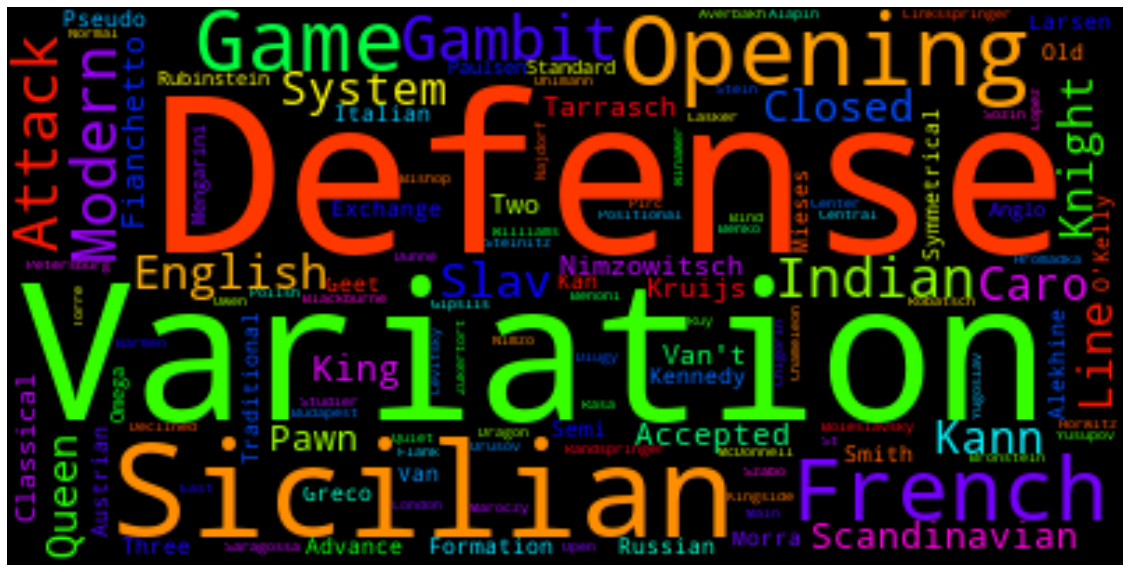

In [45]:
openings = " ".join(n for n in chess_df['Opening'].head(100))
from wordcloud import WordCloud
plt.figure(figsize=(20, 20))
wc = WordCloud(background_color='black',colormap='gist_rainbow',collocations=False).generate(openings)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The World Cloud shows 100 most played openings. The openings - Modern Defense,
Sicilian, French, Indian variation are most prominently displayed. This indicates we these openings are most played among other openings.

### Bivariate Analysis - Correlating 2 variables.
Let's try relating the variables one to other which brings interesting insights out of the data. We shall perform this Bivariate Analysis asking interesting questions to our data. Like for ex:

Which Color leads to more victories across different formats of the game? 
How does the Opening affects the winning of the game?(relating Opening to Result etc)

### 4. Which color is likely to win more games?

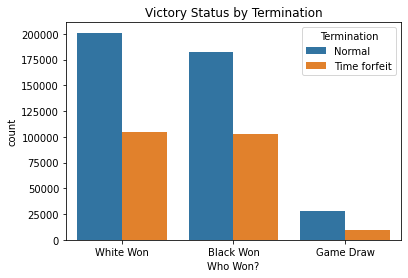

In [46]:
ax = sns.countplot( x = 'Result', hue = 'Termination', data = chess_df)
ax_attr = ax.set(xlabel = 'Who Won?', title = 'Victory Status by Termination')

In this plot, we can see that White has won more games. More games were won/drawn by Normal termination than Time forfeit.

### 5. What is the victory status across different Formats of the game?

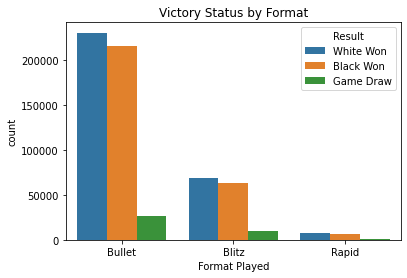

In [47]:
ax = sns.countplot( x = 'Format', hue = 'Result', data = chess_df)
ax_attr = ax.set(xlabel = 'Format Played', title = 'Victory Status by Format')


In this plot, we can see that White won more games than Black and a lesser number of games led to a Draw across various Formats of the game.

### 6. What is the count of openings which lead to Win for White / Win for Black?

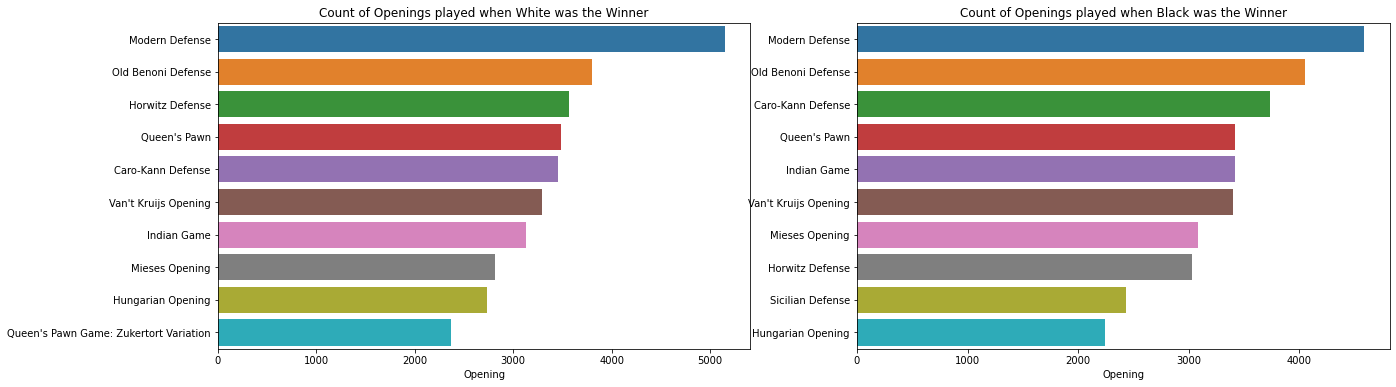

In [48]:
fig, ax = plt.subplots(1,2,figsize=(21,6))

#count of openings which lead to a win for white
winning_openings_white = chess_df['Opening'][chess_df['Result'] == 'White Won'].value_counts()
chart = sns.barplot(x = winning_openings_white[:10], y = winning_openings_white.index[:10], ax = ax[0])
#ax_attr = chart.set_yticklabels(chart.get_yticklabels(), rotation=90)
ax_attr = chart.set(title = "Count of Openings played when White was the Winner")

#count of openings which lead to a win for black
winning_openings_black = chess_df['Opening'][chess_df['Result'] == 'Black Won'].value_counts()
chart = sns.barplot(x = winning_openings_black[:10], y = winning_openings_black.index[:10], ax = ax[1])
#ax_attr = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax_attr = chart.set(title = "Count of Openings played when Black was the Winner")

We can see that the most common opening with played which helped both White & Black to win is "Modern Defense". However, the most common opening will naturally have the most number of wins as well, so this doesn't give us a clear information about which opening actually proved to be the most efficient in getting a win.<br>
To figure out the most efficient opening, let's look at the win percentage.

### 7. What are the Top 10 Most Efficient Openings for White & Black (highest winning %)?

In [49]:
#Collating the top 10 openings for white and black
winning_openings_white_top10 = winning_openings_white[:10]
winning_openings_black_top10 = winning_openings_black[:10]

#Getting the Data of the Top 10 Openings for White and Black in a separate DataFrame for each
openingSetWhite = chess_df[chess_df['Opening'].isin(winning_openings_white_top10.index)]
openingSetBlack = chess_df[chess_df['Opening'].isin(winning_openings_black_top10.index)]

#Getting the count of each opening for White in 'total_count_white'
# & Getting the count of each opening for White where White is the winner in 'total_count_white_winner'
total_count_white = openingSetWhite.groupby('Opening').count()
total_count_white_winner = openingSetWhite[openingSetWhite['Result'] == 'White Won'].groupby('Opening').count()

#Getting the count of each opening for Black in 'total_count_black'
# & Getting the count of each opening for Black where Black is the winner in 'total_count_black_winner'
total_count_black = openingSetBlack.groupby('Opening').count()
total_count_black_winner = openingSetBlack[openingSetBlack['Result'] == 'Black Won'].groupby('Opening').count()

#Calculating winning percentage for the top 10 openings for Black and White each
winning_perc_white = (total_count_white_winner/total_count_white)*100
winning_perc_black = (total_count_black_winner/total_count_black)*100


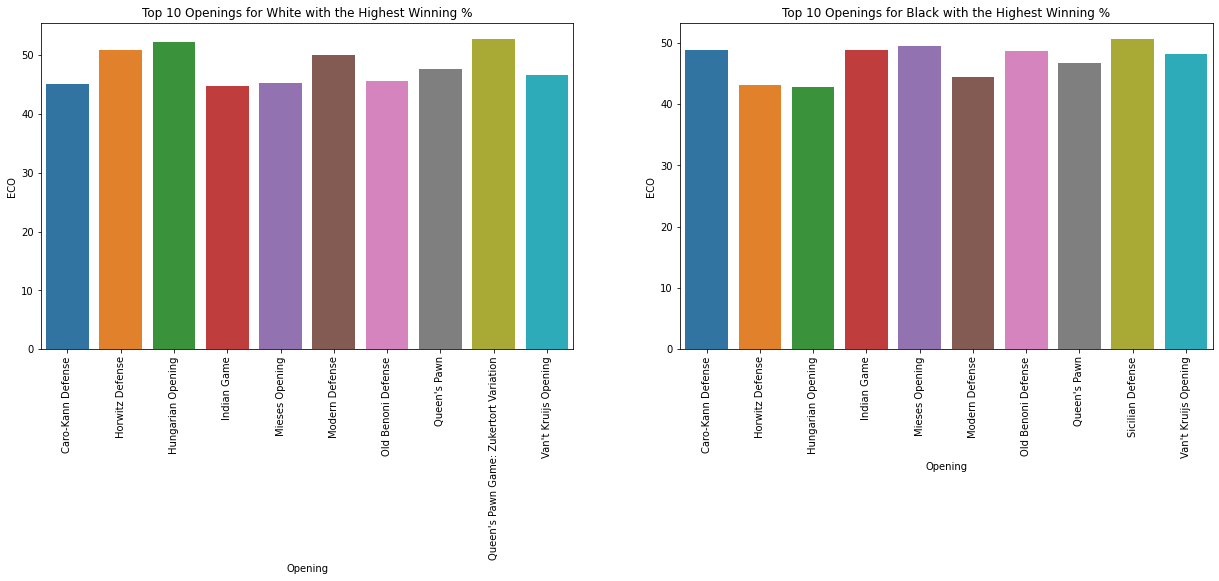

In [50]:
fig, ax = plt.subplots(1,2,figsize=(21, 6))

chart1 = sns.barplot(x=winning_perc_white.index,y=winning_perc_white.ECO, ax = ax[0])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
ax_attr = chart1.set(title = 'Top 10 Openings for White with the Highest Winning %')

chart2 = sns.barplot(x=winning_perc_black.index , y=winning_perc_black.ECO, ax = ax[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
ax_attr = chart2.set(title = 'Top 10 Openings for Black with the Highest Winning %')

In this bar plot, we can see that Hungarian Opening and Queen's Pawn Game for White and Sicilian Defense for Black, each have a winning percentage over 50%.

### 8. What are the Top 10 Winning Openings?


In [51]:
winning_openings = chess_df['Opening'][(chess_df['Result'] == 'White Won') | (chess_df['Result'] == 'Black Won')].value_counts().head(10)


In [52]:
openings = px.pie(winning_openings, values='Opening',hole=0.5, names=winning_openings.index, title='<b>Top 10 Winning Openings</b>',template = "none")
openings.update_layout(plot_bgcolor = " whitesmoke")
openings.show()

In this pie-chart, we can see that Modern Defense, Old Benoni Defense and Caro-Kann Defense are the Top 3 Winning Openings with probability of 14.6%, 11.7% and 10.8% respectively.

### 9. How does White and Black Elo Rating vary across different Formats of the Chess games?

In [ ]:
plot = px.scatter(chess_df, x="WhiteElo", y="BlackElo",color='Format',title="<b>Variation Of ELO Ratings across Formats</b>")
plot.update_layout(plot_bgcolor = "White",autosize=True)
plot.show()

![Variation Of ELO Ratings across Formats](https://i.imgur.com/VraY1aY.png)

From the graph, we can see that White and Black Elo ratings are correlated to each other. <br>
For the Rapid games, the ratings are between 2000 and 2400. <br>
For the Blitz games, the range lies between 2400 to 2700. <br>
Whereas for the Bullet games, the ratings are above 2700. <br>

## Step-7 : Wrapping up the project

### Summary
We've drawn many inferences from the analysis. Here's a summary of a few of them:
* Modern Defense, Old Benoni Defense and Caro-Kann Defense are some of the most played openings, also resulting in most wins for White & Black
* White is likely to win more games than Black in Normal Termination of games, whereas both are equally likely to win in Time Forfeit.
* White has won more games than Black across different Formats while the drawn games is less.
* For the Format where Time Control is less, the ELO Rating of players is higher.

### Future Works
* What is the winning percentage of each opening for White and Black?
* Why are certain openings more preferred than others?
* Which openings have got more representation in various formats?
* How can winning percentage be translated into ELO rating gain?
* Is aiming for Time Forfeit victory a better strategy than Normal Termination
(specially in Formats where time allocated is less)? 

### References
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/assignment/exploratory-data-analysis-project
* https://www.kaggle.com/datasets/arevel/chess-games
* http://www.xenonstack.com/blog/data-preparation

## Step-8 : Submission - Uploading Notebook to Jovian

In [54]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
